# Predicting Hotel Reservations Cancelation
By Chris Alexander

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Loading Data

In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
import zipfile
import os
from tqdm import tqdm
# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [2]:
data=pd.read_csv("Hotel Reservations.csv")

In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Cleaning Data

In [4]:
print(data.iloc[:,0:20].isna().sum())
#no Nan value is present in the dataset

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


### One Hot encoding

In [5]:

from sklearn.preprocessing import OneHotEncoder
def one_hot_encoding(data, columns):
    encode = OneHotEncoder(handle_unknown='ignore')
    encoded=encode.fit_transform(data[columns]).toarray()
    encoded_df = pd.DataFrame(encoded, columns =encode.get_feature_names_out())
    return data.join(encoded_df)

In [6]:
data1 = one_hot_encoding(data, ["booking_status",'room_type_reserved','type_of_meal_plan'])

In [7]:
data1

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Droping Duplicates

In [8]:
def remove_duplicates(data):
    return data.drop_duplicates() # removing entries which are repeated

In [9]:
remove_duplicates(data).shape # As the shape has not changed we can say that there was no duplicate entries

(36275, 19)

In [10]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
   
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a data frame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    data_2=data[data[variable]<= upper]
    data_3=data_2[data_2[variable]>= lower]
    return data_3

### Pipeline

In [11]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [12]:
data_test=data.copy()

In [13]:
def Target_encode(data, col):
    dict_rep={col:{'Canceled': 1, 'Not_Canceled': 0}}
    data = data.replace(dict_rep)
    return data

In [14]:
def process_data_gm(data, pipeline_functions):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    return data

def drop_columns(data, *col):
    """Drop columns passed as arguments."""
    return data.drop(list(col),axis=1)
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]
#(select_columns, ['Log baseFare','totalTravelDistance','isBasicEconomy', 'isRefundable', 'isNonStop','Flight_duration' ], None)

In [15]:
#processing the data on Feature engineering functions
def log_transform(data, col):
    data['Log ' + col] = np.log(data[col])
    return data

pipelines = [
    (remove_duplicates, None, None),
    (one_hot_encoding, [['type_of_meal_plan','room_type_reserved','market_segment_type','arrival_year']], None),#
    (drop_columns, ['Booking_ID','type_of_meal_plan','room_type_reserved','market_segment_type','arrival_year'], None),#add column names you wanna drop
    (Target_encode, ['booking_status'], None),
    (remove_outliers, None, {'variable': 'lead_time','upper': 300})
]

In [16]:
data_test = process_data_gm(data_test, pipelines)

In [17]:
data_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,arrival_year_2017,arrival_year_2018
0,2,0,1,2,0,224,10,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,0,2,3,0,5,11,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0,2,1,0,1,2,28,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,0,0,2,0,211,5,20,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,0,1,1,0,48,4,11,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,8,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36271,2,0,1,3,0,228,10,17,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36272,2,0,2,6,0,148,7,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36273,2,0,0,3,0,63,4,21,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Now the data is prepared for learning and Exploratory Data Analysis.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### Exploratory Data Analysis

<AxesSubplot:>

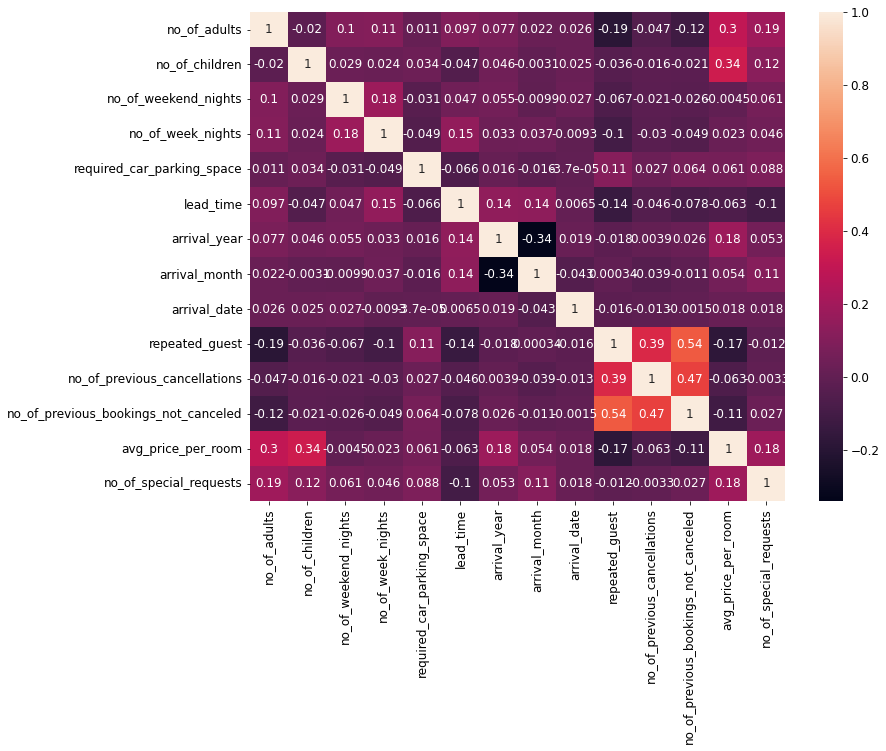

In [18]:
corrMatrix = data.corr()
#print(corrMatrix)
sns.heatmap(corrMatrix, annot=True,)

In [19]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Based on data. Following are questions that can be answered.
 1) Do people select a meal plan?\
 2) How many months prior do people plan their stay at the hotel?\
 3) Which month of the year do people like to travel?\
 4) How do people usually book their stay at the hotel?\
 5) What is the average price of the room?\
 6) How many nights do they like to spend?\
 7) If kids are present then do they cancel booking ahead or later?\

#### Does not selecting a meal plan mean that there could be more cancelations

In [20]:
meal_plan=data.groupby(['type_of_meal_plan',"booking_status"]).size()
meal_plan#.sum()
# p_not_selected=((meal_plan[3]/meal_plan.sum())*100).round(2)
# p_not_selected

type_of_meal_plan  booking_status
Meal Plan 1        Canceled           8679
                   Not_Canceled      19156
Meal Plan 2        Canceled           1506
                   Not_Canceled       1799
Meal Plan 3        Canceled              1
                   Not_Canceled          4
Not Selected       Canceled           1699
                   Not_Canceled       3431
dtype: int64

In [21]:
Arival_year=data.groupby(['arrival_year',"booking_status"]).size()
Arival_year

arrival_year  booking_status
2017          Canceled            961
              Not_Canceled       5553
2018          Canceled          10924
              Not_Canceled      18837
dtype: int64

**histogram for lead time to see most common lead time**

Text(0.5, 1.0, 'histogram of lead time')

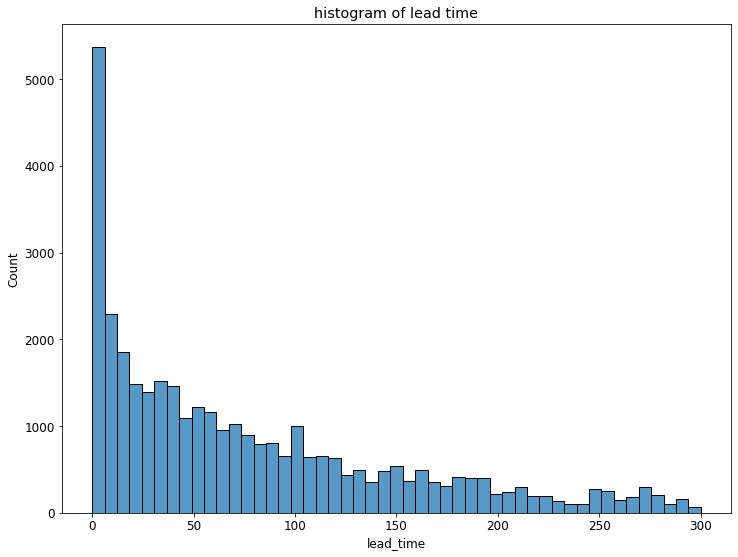

In [22]:
sns.histplot(data=data_test, x="lead_time")
plt.title("histogram of lead time")

**Which months do people stay at the hotel more**

Text(0.5, 1.0, 'histogram of arrival month')

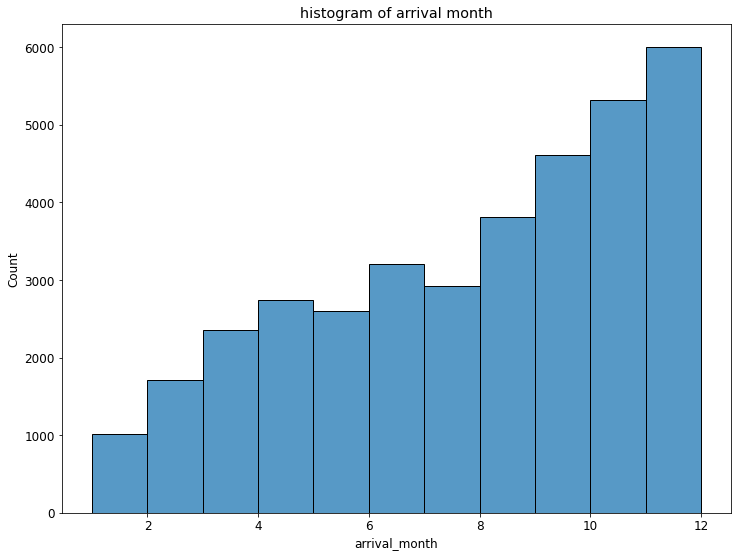

In [23]:
sns.histplot(data=data, x="arrival_month",binwidth=1)
plt.title("histogram of arrival month")

**how many week nights do people like to stay**

<AxesSubplot:xlabel='no_of_week_nights', ylabel='Count'>

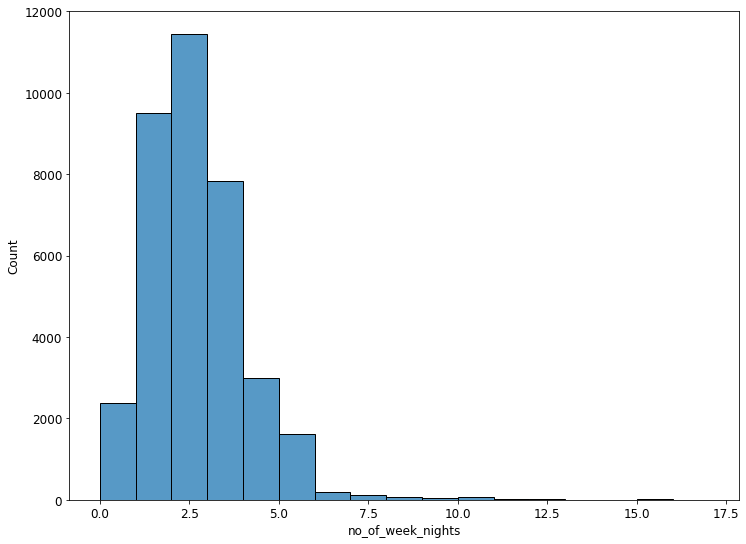

In [24]:
sns.histplot(data=data, x="no_of_week_nights",binwidth=1)

**Whats the most common market_segment_type**

Text(0.5, 1.0, 'market segment')

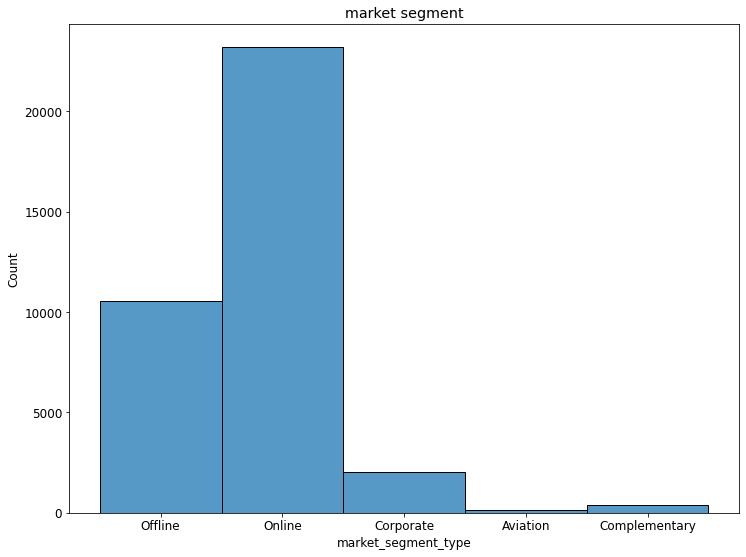

In [25]:
sns.histplot(data=data, x="market_segment_type")
plt.title("market segment")

In [26]:
data["avg_price_per_room"].mean()

103.4235390764958

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### Modeling and Insights from this process

In [27]:
# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split
#we want to split the data in 80:20 for train:test dataset

X = data_test.drop(columns = ['booking_status']).copy()
y = data_test['booking_status']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=42)

In [28]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,arrival_year_2017,arrival_year_2018
13200,2,0,1,3,0,210,10,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
23986,2,0,1,2,0,150,4,22,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23775,2,0,2,6,0,69,9,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23276,1,0,0,3,0,71,6,14,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26725,2,0,0,2,0,22,9,16,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,2,0,0,3,0,12,8,5,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6466,2,0,1,1,0,24,8,20,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11652,1,0,0,2,0,4,11,2,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
884,2,0,0,2,0,67,9,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Random forest with one hot encoding

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print("train accuracy with One hot encoding is ",clf.score(X_train, y_train).round(3))
print("test accuracy with One hot encoding encoding is ",clf.score(X_test, y_test).round(3))

train accuracy with One hot encoding is  0.798
test accuracy with One hot encoding encoding is  0.795


<AxesSubplot:>

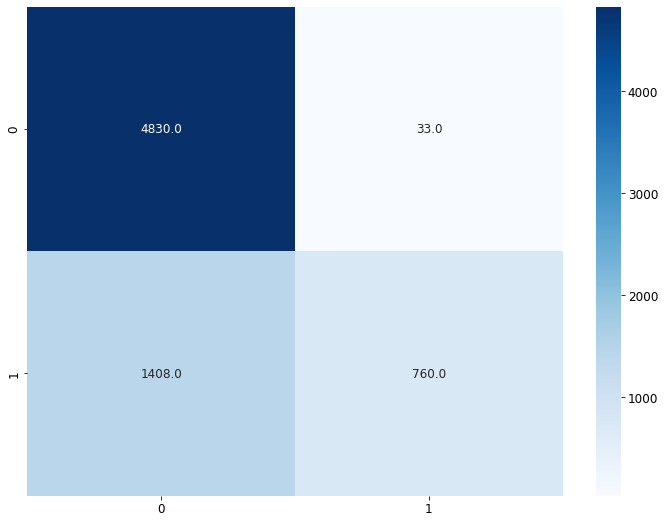

In [30]:
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True, cmap="Blues",fmt=".1f")

In [31]:
data_test2=data.copy()

In [32]:
data_test2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [33]:
data_test2['type_of_meal_plan']=data_test2['type_of_meal_plan'].map(dict({'Meal Plan 1': 0, 'Meal Plan 2':1, 'Meal Plan 3':2, 'Not Selected':3}))
data_test2['room_type_reserved']=data_test2['room_type_reserved'].map(dict({'Meal Plan 1': 0, 'Meal Plan 2':1, 'Meal Plan 3':2, 'Not Selected':3}))

In [34]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,col):
    for i in col:
        labelencoder = LabelEncoder()
        data[i] = labelencoder.fit_transform(data[i])
    return data

In [35]:
# label_encode(data_test2, "room_type_reserved")

In [36]:
pipelines2 = [
    (remove_duplicates, None, None),
    (label_encode, [['type_of_meal_plan','room_type_reserved','market_segment_type']], None),#
    (drop_columns, ['Booking_ID'], None),#add column names you wanna drop
    (Target_encode, ['booking_status'], None),
    (remove_outliers, None, {'variable': 'lead_time','upper': 300})
]

In [37]:
data_test3 = process_data_gm(data_test2, pipelines2)

In [38]:
data_test3

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,1
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,0,85,2018,8,3,4,0,0,0,167.80,1,0
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,1
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,0
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,1


In [39]:
X = data_test3.drop(columns = ['booking_status']).copy()
y = pd.DataFrame(data_test3['booking_status'])

# In the first step we will split the data in training and remaining dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, train_size=0.8,random_state=42)

In [57]:
clf = RandomForestClassifier(n_estimators=1200, max_depth=17, random_state=0)
clf.fit(X_train1, y_train1)
clf.predict(X_test1)
print("train accuracy is ",clf.score(X_train1, y_train1).round(3))
print("test accuracy is",clf.score(X_test1, y_test1).round(3))

train accuracy is  0.941
test accuracy is 0.898


In [58]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:>

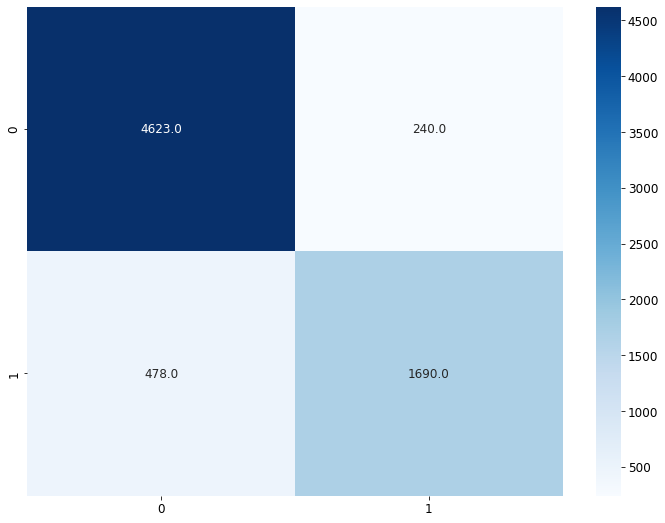

In [59]:
sns.heatmap(confusion_matrix(y_test1, clf.predict(X_test1)), annot=True, cmap="Blues",fmt=".1f")

In [43]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_train1), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(X_test1), columns = X.columns)

In [44]:
#normed_train_data

In [45]:
clf1 = RandomForestClassifier(n_estimators=1200,max_depth=10, random_state=0)
clf1.fit(normed_train_data, y_train1)
preds=clf1.predict(normed_test_data)
print("train accuracy with standard scaler is",clf1.score(normed_train_data, y_train1).round(3))
print("test accuracy with standard scaler is",clf1.score(normed_test_data, y_test1).round(3))

train accuracy with standard scaler is 0.885
test accuracy with standard scaler is 0.871


<AxesSubplot:>

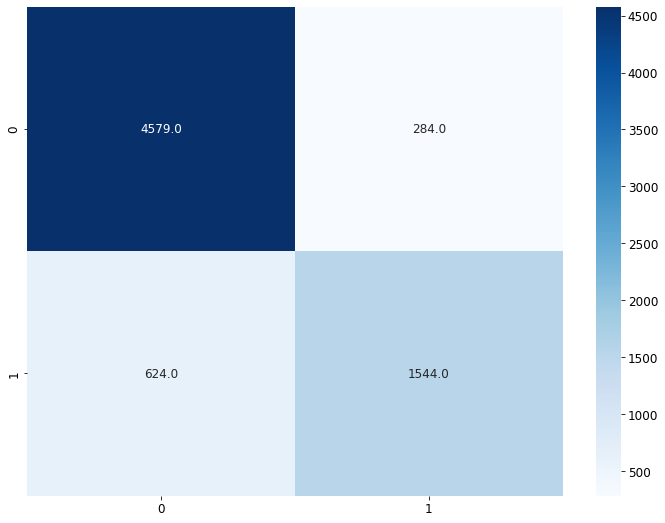

In [46]:
sns.heatmap(confusion_matrix(y_test1, clf1.predict(normed_test_data)), annot=True, cmap="Blues",fmt=".1f")

In [47]:
pd.DataFrame(clf1.feature_importances_, index=normed_train_data.columns).sort_values(by=0, ascending=False).head()

,0
lead_time,0.371277
no_of_special_requests,0.175087
avg_price_per_room,0.135735
market_segment_type,0.083935
arrival_month,0.063652


In [48]:
#decision tree
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(random_state=0)
clf2.fit(X_train1, y_train1)
print("train accuracy ",clf2.score(X_train1, y_train1).round(3))
print("test accuracy ",clf2.score(X_test1, y_test1).round(4))

train accuracy  0.995
test accuracy  0.8636


<AxesSubplot:>

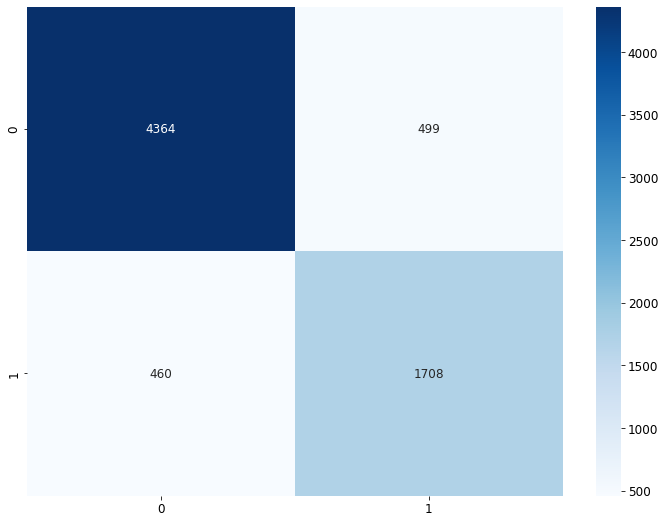

In [49]:
sns.heatmap(confusion_matrix(y_test1, clf2.predict(X_test1)), annot=True, cmap="Blues",fmt=".0f")

In [50]:
pd.DataFrame(clf2.feature_importances_, index=X_test1.columns).sort_values(by=0, ascending=False).head()

,0
lead_time,0.330266
avg_price_per_room,0.185587
market_segment_type,0.104367
arrival_date,0.091534
arrival_month,0.070239


In [51]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                                n_jobs = 4)
rf_random.fit(X_train1, y_train1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 1342,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 100,
 'criterion': 'entropy',
 'bootstrap': False}

In [54]:
print ("Train accuracy with tuned parameters",rf_random.score(X_train1, y_train1).round(3))
print("Test accuracy with tuned parameters",rf_random.score(X_test1, y_test1).round(3))

Train accuracy with tuned parameters 0.987
Test accuracy with tuned parameters 0.901


<AxesSubplot:>

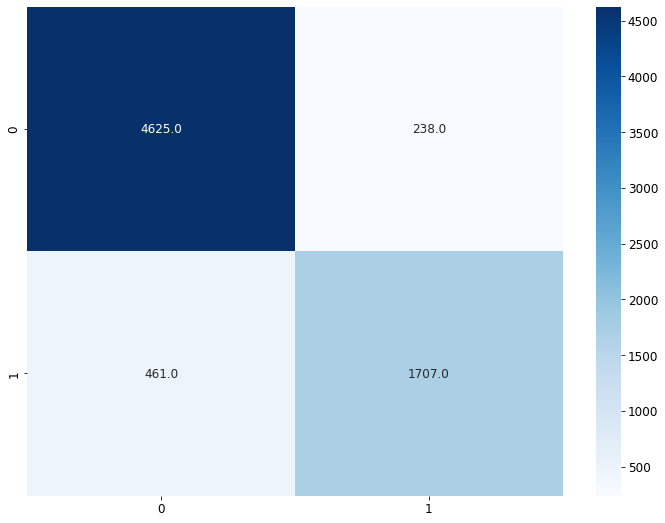

In [55]:
sns.heatmap(confusion_matrix(y_test1, rf_random.predict(X_test1)), annot=True, cmap="Blues",fmt=".1f")

In [56]:
y_test.shape

(7031,)

In [464]:
from sklearn.metrics import zero_one_loss
print (zero_one_loss(y_train, rf_random.predict(normed_train_data)))
print(zero_one_loss(y_test, rf_random.predict(normed_test_data)))

0.31305120910384066
0.30834874128857914


In [465]:
#polynomial features how does the model react
from sklearn.preprocessing import PolynomialFeatures
def poly_plot(X_train, y_train,X_val, y_val, d):
    # data --> Input data(nparray).
    # d --> polynomial degree.
    MSE_list= []
    val_MSE_list= []
    n=np.linspace(1,d,num=d)

    for i in range(1,d+1):
        poly=PolynomialFeatures(i, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        x_val_poly = poly.fit_transform(X_val)
        clf5 = RandomForestClassifier(max_depth=17, random_state=0)
        clf5.fit(X_train_poly, y_train)
        MSE_list.append(1-clf5.score(X_train_poly, y_train))  
        val_MSE_list.append(1-clf5.score(x_val_poly, y_test))
        
    plt.plot(n,MSE_list,label ='train mse')
    plt.plot(n,val_MSE_list,label ='test mse')
    plt.legend()
    plt.title("Training and validation error for different polynomial feature")
    plt.xlabel("polynomial number")
    plt.ylabel("mse")
    return MSE_list, val_MSE_list
    


In [466]:
normed_test_data.shape

(7031, 17)

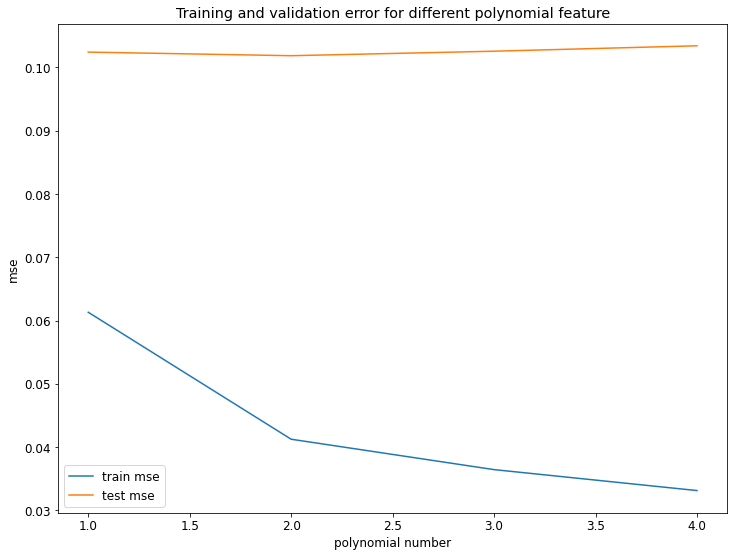

In [467]:
MSE_list1, val_MSE_list1=poly_plot(X_train1, y_train1, X_test1, y_test1, 4)

In [468]:
MSE_list1, val_MSE_list1

([0.0613086770981508,
  0.04125177809388336,
  0.03645092460881938,
  0.033143669985775226],
 [0.10240364101834731,
  0.10183473190157877,
  0.10254586829753942,
  0.10339923197269241])

In [469]:
#cross validation

In [504]:
#increasing the number tree how does error change 
from sklearn.preprocessing import PolynomialFeatures
def vary_no_of_tree(X_train, y_train, X_test, y_test):
    # data --> Input data(nparray).
    # d --> polynomial degree.
    oob_list= []
    MSE_list= []
    test_MSE_list= []
#     val_MSE_list= []
    n_estimator = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)

    for i in tqdm(n_estimator):
        clf = RandomForestClassifier(n_estimators=i, max_depth=15, random_state=0, oob_score=True)
        clf.fit(X_train, y_train)
        oob_list.append(1 - clf.oob_score_)
        MSE_list.append(1-clf.score(X_train, y_train))
        test_MSE_list.append(1-clf.score(X_test, y_test))
#         val_MSE_list.append(1-clf.score(X_test, y_test))
        
    plt.loglog(n_estimator,oob_list,label="OOB error")
    plt.loglog(n_estimator,MSE_list,label="train error")
    plt.loglog(n_estimator,test_MSE_list, label="test error")
    plt.legend()
    plt.title("error vs n_estimator")
    plt.xlabel("n_estimator")
    plt.ylabel("Error")

100%|██████████| 15/15 [11:07<00:00, 44.52s/it]


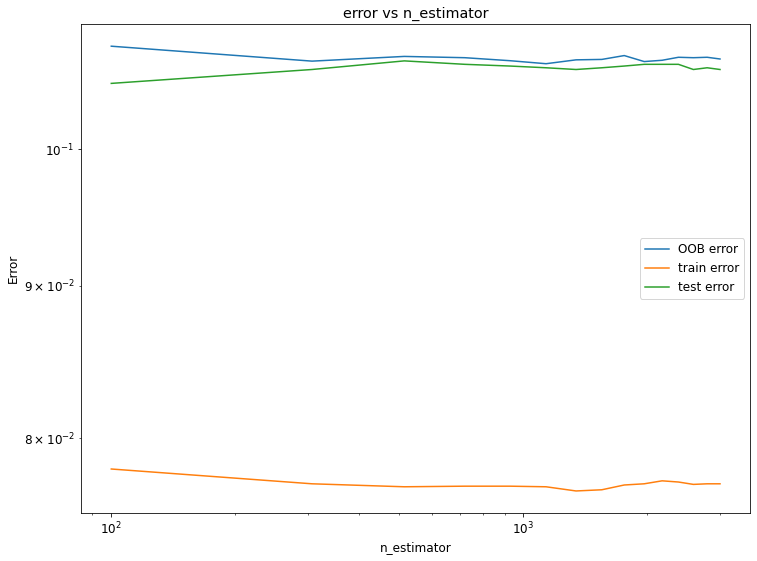

In [505]:
vary_no_of_tree(X_train1, y_train1, X_test1, y_test1)

In [472]:
#increasing the number tree how does error change 
def vary_depth(X_train, y_train, X_test, y_test):
    # data --> Input data(nparray).
    # d --> polynomial degree.
    oob_list= []
    MSE_list= []
    test_MSE_list= []
#     val_MSE_list= []
    max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]

    for i in tqdm(max_depth):
        clf = RandomForestClassifier(n_estimators=500, max_depth=i, random_state=0, oob_score=True)
        clf.fit(X_train, y_train)
        oob_list.append(1 - clf.oob_score_)
        MSE_list.append(1-clf.score(X_train, y_train))
        test_MSE_list.append(1-clf.score(X_test, y_test))
#         val_MSE_list.append(1-clf.score(X_test, y_test))
        
    plt.loglog(max_depth,oob_list,label="OOB error")
    plt.loglog(max_depth,MSE_list,label="train error")
    plt.loglog(max_depth,test_MSE_list, label="test error")
    plt.legend()
    plt.title("error vs Max_depth")
    plt.xlabel("Max_depth")
    plt.ylabel("Error")

100%|██████████| 9/9 [01:45<00:00, 11.74s/it]


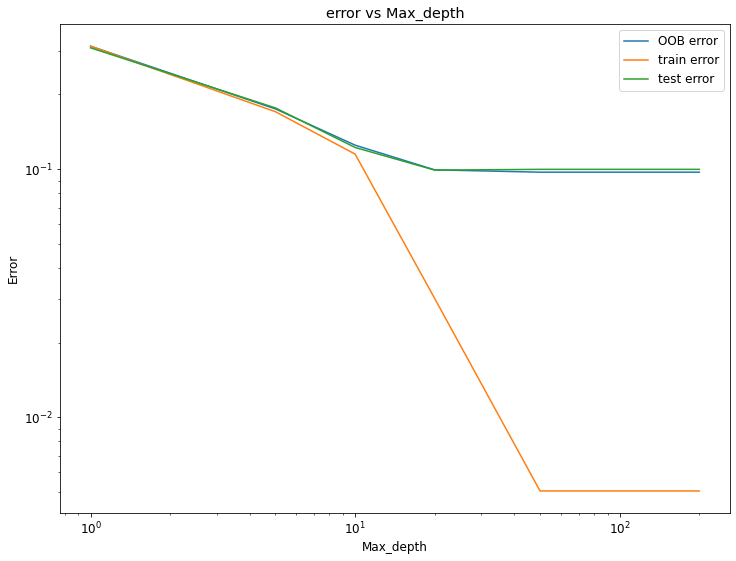

In [473]:
vary_depth(X_train1, y_train1, X_test1, y_test1)

In [474]:
clf3 = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=0,oob_score=True)
clf3.fit(normed_train_data, y_train)
preds=clf3.predict(normed_test_data)
print(clf3.score(normed_train_data, y_train))
print(clf3.score(normed_test_data, y_test))
print(1 - clf3.oob_score_)

0.9698435277382645
0.8947518133978097
0.09943100995732579


In [475]:
#parameter tuning using grid search
#increasing the number tree how does error change 
def vary_depth_hot(X_train_hot, y_train_hot,X_test_hot, y_test_hot,X_train_l, y_train_l,X_test_l, y_test_l):
    # data --> Input data(nparray).
    # d --> polynomial degree.
    hot_MSE_list= []
    hot_test_MSE_list= []
    l_MSE_list= []
    l_test_MSE_list= []
    max_depth = [1, 5, 10, 20, 50, 75, 100]

    for i in tqdm(max_depth):
        clf = RandomForestClassifier(n_estimators=500,max_depth=i, random_state=0)
        clf.fit(X_train_hot, y_train_hot)
        clf.predict(X_test_hot)
        hot_MSE_list.append(clf.score(X_train_hot, y_train_hot))
        hot_test_MSE_list.append(clf.score(X_test_hot, y_test_hot))
        clf2 = RandomForestClassifier(n_estimators=500,max_depth=i, random_state=0)
        clf2.fit(X_train_l, y_train_l)
        clf2.predict(X_test_l)
        l_MSE_list.append(clf2.score(X_train_l, y_train_l))
        l_test_MSE_list.append(clf2.score(X_test_l, y_test_l))

#         val_MSE_list.append(1-clf.score(X_test, y_test))
        
    plt.plot(max_depth,hot_MSE_list, label="one hot encoding train accuracy")
    plt.plot(max_depth,hot_test_MSE_list,label="one hot encoding test accuracy")
    plt.plot(max_depth,l_MSE_list,label="label encoding train accuracy")
    plt.plot(max_depth,l_test_MSE_list,label="label encoding test accuracy")
    plt.legend()
    plt.title("accuracy vs max_depth")
    plt.xlabel("max_depth")
    plt.ylabel("accuracy")

100%|██████████| 7/7 [02:26<00:00, 20.86s/it]


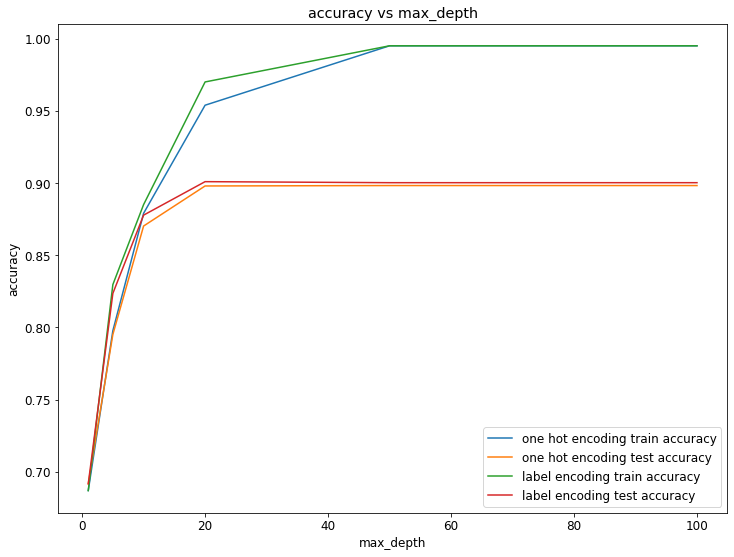

In [476]:
vary_depth_hot(X_train, y_train,X_test, y_test,X_train1, y_train1,X_test1, y_test1)

In [477]:
#what about balance and unbalanced data

In [478]:
from sklearn.preprocessing import OneHotEncoder
def encode_one_hot(data):
    encode = OneHotEncoder(handle_unknown='ignore')
    encoded=encode.fit_transform(data).toarray()
#     encoded_df = pd.DataFrame(encoded, columns =encode.get_feature_names_out())
    return pd.DataFrame(encoded) #data.join(encoded_df)

In [479]:
from sklearn.utils import check_random_state
from scipy import stats as st

In [480]:
#random forest using sklearn decison tree
from sklearn import tree
# from utilities import *

class RandomforestClassifier:
    def __init__(self, n_trees=100, random_state=None, max_depth=None,  
                     max_features=None, min_samples_leaf=1, sample_size=None, 
                     bootstrap=True,  oob_score=False):
        self.n_trees = n_trees
        self.RandomState = check_random_state(random_state)
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_leaf=min_samples_leaf
        self.sample_size = sample_size
        self.bootstrap = bootstrap
#         self.oob_score = oob_score
        
    def fit(self, X, Y):
#         if Y.ndim == 1:
#             Y = encode_one_hot(Y) # one-hot encoded y variable

        # set internal variables
        self.n_features = X.shape[1]
        self.n_classes = Y.shape[1]
        self.features = X.columns
        n_samples = X.shape[0]
        self.sample_size_ = n_samples if self.sample_size is None else self.sample_size

        # create decision trees
        self.trees = []
        rng_states = [] # save the random states to regenerate the random indices for the oob_score
        for i in range(self.n_trees):
#             rng_states.append(self.RandomState.get_state())
            self.trees.append(self._create_tree(X, Y))

#         # set attributes
#         self.feature_importances_ = self.impurity_feature_importances()
#         if self.oob_score:
#             if not (self.bootstrap or (self.sample_size_<n_samples)):
#                     warnings.warn("out-of-bag score will not be calculated because bootstrap=False")
#             else:
#                 self.oob_score_ = self.calculate_oob_score(X, Y, rng_states)
                
                
    def _create_tree(self, X, Y):
        assert len(X) == len(Y), ""
        n_samples = X.shape[0]

        # get sub-sample 
        if self.bootstrap: # sample with replacement
            rand_idxs = self.RandomState.randint(0, n_samples, self.sample_size_) 
            X_, Y_ = X.iloc[rand_idxs, :], Y.iloc[rand_idxs, :] #
        elif self.sample_size_ < n_samples: # sample without replacement
            rand_idxs = self.RandomState.permutation(np.arange(n_samples))[:self.sample_size_]  
            X_, Y_ = X.iloc[rand_idxs, :], Y.iloc[rand_idxs, :]
        else:
            X_, Y_ = X.copy(), Y.copy() # do nothing to the data

        new_tree =  tree.DecisionTreeClassifier(max_depth=self.max_depth, 
                                 max_features=self.max_features,
                                 random_state=self.RandomState,
                                 min_samples_leaf=self.min_samples_leaf)
        new_tree.fit(X_, Y_)
        return new_tree 
    def predict_y(self, X) -> np.ndarray: 
        return [t.predict(X) for t in self.trees]

    def score(self, X, y) -> float:
        y_pred = self.predict_y(X)
        return np.mean(y_pred==y)
    
# clf2 = tree.DecisionTreeClassifier(random_state=0)
# clf2.fit(X_train1, y_train1)
# print("train accuracy ",clf2.score(X_train1, y_train1).round(3))
# print("test accuracy ",clf2.score(X_test1, y_test1).round(4))

In [481]:
clf = RandomforestClassifier(n_trees=500, max_depth=15, max_features="auto", random_state=5)
clf.fit(X_train1, y_train1)



In [482]:
clf.predict_y(X_test1)

[array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 1, ..., 1, 0, 0], dt

In [483]:
print("train accuracy is ",clf.score(X_train1, y_train1).round(3))
print("test accuracy is ",clf.score(X_test1, y_test1).round(3))

ValueError: Unable to coerce list of <class 'numpy.ndarray'> to Series/DataFrame

In [484]:
encode_one_hot(pd.DataFrame(y_train1)).shape

(28120, 2)

In [485]:
y_train1

,booking_status
13200,1
23986,0
23775,1
23276,0
26725,0
...,...
17411,0
6466,0
11652,0
884,1


In [486]:
from sklearn.metrics import accuracy_score

In [ ]:
def Randomforest(X, y, X_test, y_test, n_trees=100, max_depth=5, random_state=3,sample_size=None):
    pred=[]
    RandomState = check_random_state(random_state)
    n_samples = X.shape[0]
    sample_size_ = n_samples if sample_size is None else int(n_samples*sample_size)
    for i in range(n_trees):
        rand_idxs = RandomState.randint(0, n_samples, sample_size_) 
        X_, y_ = X.iloc[rand_idxs, :], y.iloc[rand_idxs, :]
        tree_=tree.DecisionTreeClassifier(max_depth=max_depth, max_features="auto",random_state=3)
        tree_.fit(X_,y_)
        pred.append(tree_.predict(X_test))
    ypreds= st.mode(pred, axis=1)[0].reshape(1,-1)   
    return  accuracy_score(ypreds,np.array(y_test))

In [257]:
Randomforest(X_train1, y_train1, X_test1, np.array(y_test1).reshape(1,-1), n_trees=100, max_depth=20,sample_size=.5)

ValueError: inconsistent shapes

In [487]:
from sklearn.metrics import zero_one_loss

In [488]:
import statistics

In [500]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import statistics

class RandomforestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []
    
    def fit(self, X, y):
        self.estimators = []
        n_samples = len(X)
        for _ in range(self.n_estimators):
            estimator = DecisionTreeClassifier(max_depth=self.max_depth, max_features="auto",
                                 random_state=2)
            sample_indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample = X.iloc[sample_indices,:]
            y_sample = y.iloc[sample_indices,:]
            estimator.fit(X_sample, y_sample)
            self.estimators.append(estimator)
    
    def predict(self, X):
        predictions = []
        for estimator in self.estimators:
            predictions.append(estimator.predict(X))
        final_preds=[]
        for n in (np.array(predictions).T):
            final_preds.append(statistics.mode(n))
        return np.array(final_preds).reshape(-1,1) #st.mode(predictions, axis=0)[0].reshape(1,-1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [490]:
# Create an instance of the RandomForestClassifier
rf = RandomforestClassifier(n_estimators=1200, max_depth=17)

# Train the random forest classifier
rf.fit(X_train1, y_train1)

# Make predictions
y_pred_train = rf.predict(X_train1)
y_pred_test = rf.predict(X_test1)


In [491]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [492]:
final_preds

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [493]:
#accuracy = rf.score(X_test1, np.array(y_test1).reshape(1,-1))

In [494]:
np.array(y_pred).shape

(7255, 1)

In [495]:
np.array(final_preds).reshape(-1,1).shape

(7255, 1)

In [497]:
from sklearn.metrics import accuracy_score
print("train acurracy of Random forest from scratch is", accuracy_score(y_pred_train , np.array(y_train1)).round(3))
print("test acurracy of Random forest from scratch is", accuracy_score(y_pred_test , np.array(y_test1)).round(3))

train acurracy of Random forest from scratch is 0.934
test acurracy of Random forest from scratch is 0.894


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

#### Inference and Conclusion

In [ ]:
#lessons learned
# standard normalizing of data with scale widly different is very important